In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
data=pd.read_csv("Iris.csv")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### To check any missing data in any row

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [7]:
data.drop('Id',axis=1,inplace=True)

### relation between sepal length and width

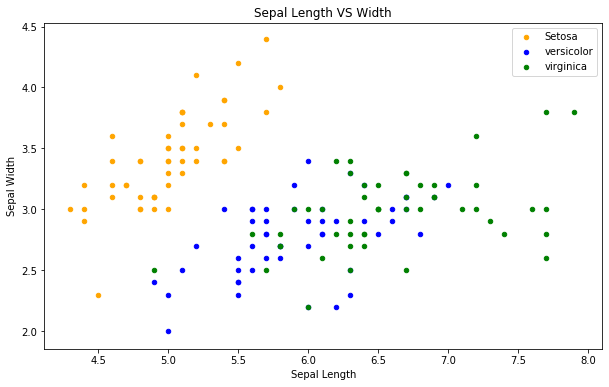

In [8]:
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf() # gcf is get current figure
fig.set_size_inches(10,6)
plt.show()

### relation between petal length and width

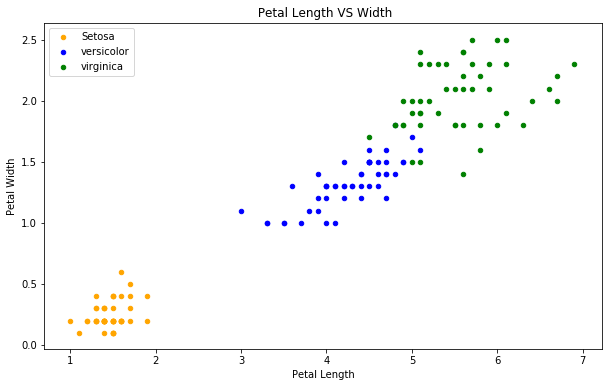

In [9]:
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

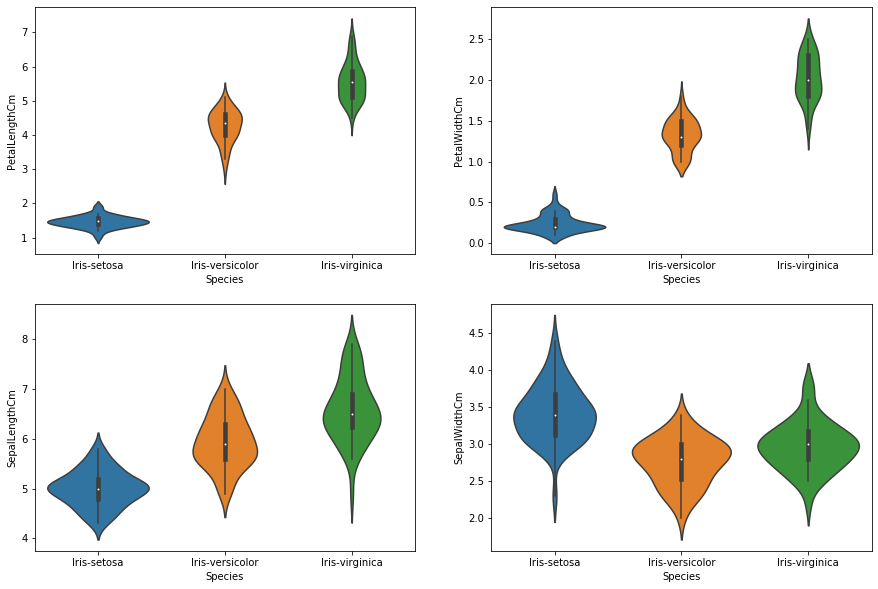

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

### The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

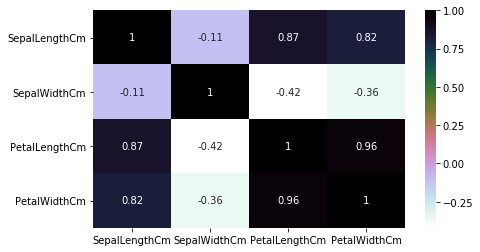

In [11]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

### Splitting data to train and test

In [16]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


### Taking required features

In [17]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species # output of our training data
test_x= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species   #output value of test data

### The given problem statement is a classification model so we now apply different algorithms to come to a conclusion on which model predicts more accurately

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [21]:
seed = 7

In [24]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, train_x,train_y, cv=kfold, scoring= 'accuracy' )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

LR: 0.892727
KNN: 0.961818
DTC: 0.915455
NB: 0.934545
SVM: 0.970909


In [25]:
svn = SVC()
svn.fit(train_x, train_y)
predictions = svn.predict(test_x)
print(accuracy_score(test_y, predictions))
print(confusion_matrix(test_y, predictions))
#print(classification_report(test_y, predictions))

0.9777777777777777
[[15  0  0]
 [ 0 21  1]
 [ 0  0  8]]


In [26]:
X_new = np.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


In [27]:
prediction = svn.predict(X_new)

In [28]:
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-setosa']
